<b>Download all libraries below</b>


pip install matplotlib seaborn pandas numpy plotly dash panel

<b> 1. Seaborn Basics: Clean, Informative Statistical Visualizations</b>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


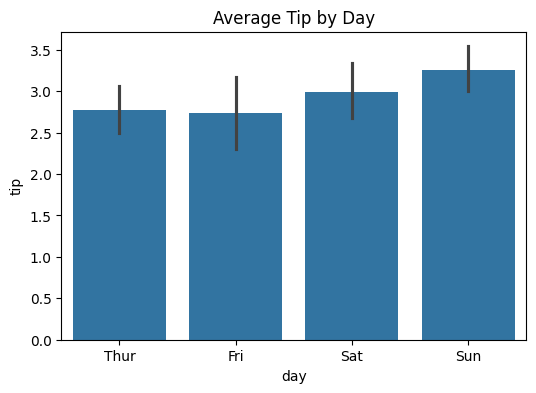

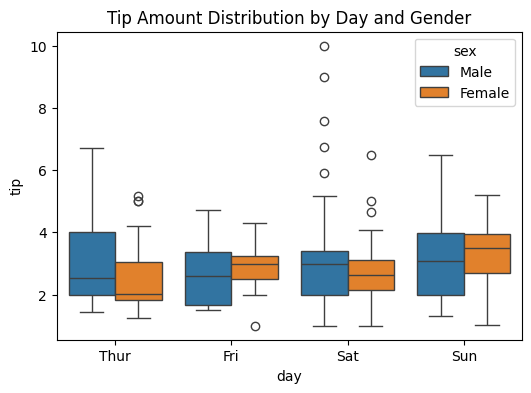

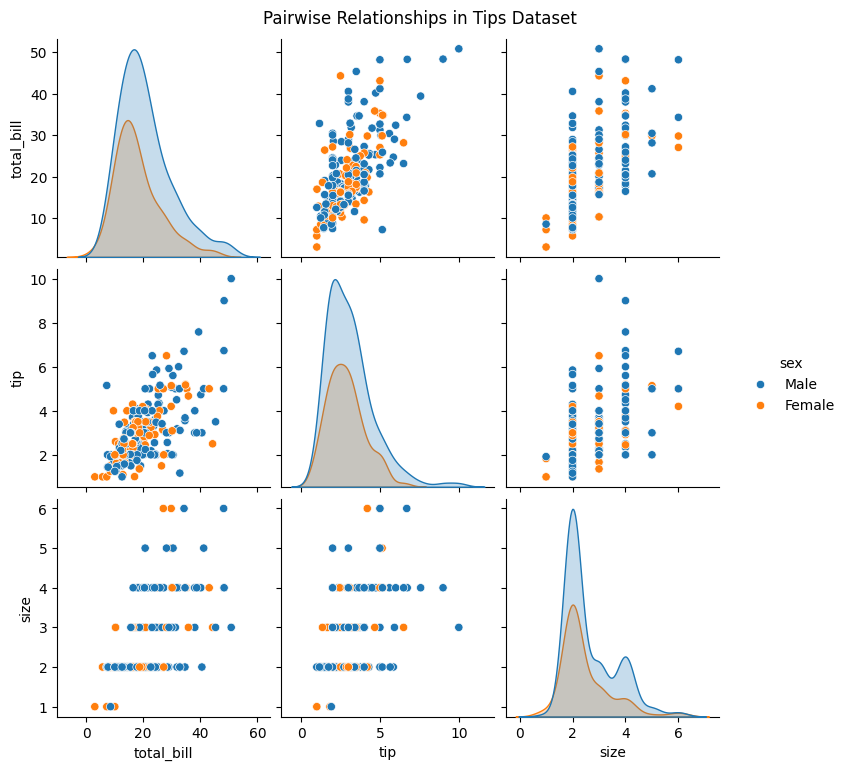

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load built-in Seaborn example dataset (tips)
tips = sns.load_dataset('tips')
display(tips.head())

# 1. Bar Plot: Average Tip by Day
plt.figure(figsize=(6, 4))
sns.barplot(data=tips, x='day', y='tip')
plt.title('Average Tip by Day')
plt.show()

# 2. Box Plot: Tip Distribution by Day, with Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x='day', y='tip', hue='sex')
plt.title('Tip Amount Distribution by Day and Gender')
plt.show()

# 3. Pairplot: Relationships and Distributions
sns.pairplot(tips, hue='sex')
plt.suptitle('Pairwise Relationships in Tips Dataset', y=1.02)
plt.show()



<b>2. Seaborn Customization & Best Practices</b>


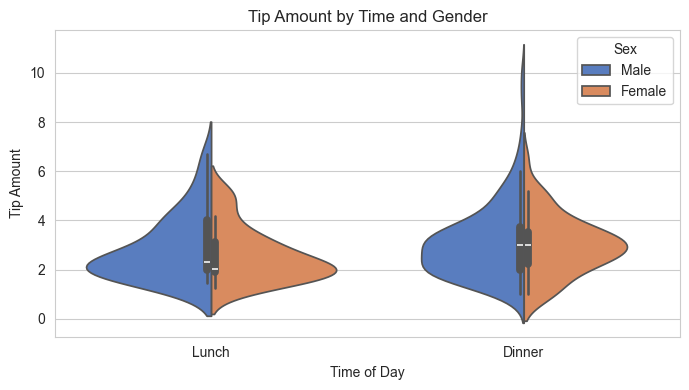

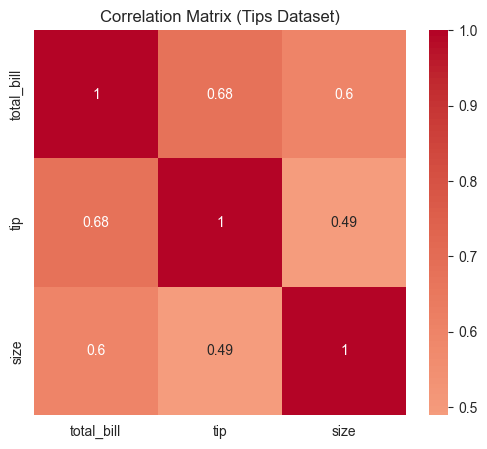

In [3]:
# Seaborn Customization for Clarity and Impact
# Set style
sns.set_style('whitegrid')

# Violin Plot: Tip Amount by Time of Day (Lunch/Dinner), colored by sex
plt.figure(figsize=(7, 4))
sns.violinplot(data=tips, x='time', y='tip', hue='sex', split=True, palette='muted')
plt.title('Tip Amount by Time and Gender')
plt.xlabel('Time of Day')
plt.ylabel('Tip Amount')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# Select only numeric columns
numeric_tips = tips.select_dtypes(include='number')
corr_matrix = numeric_tips.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Tips Dataset)')
plt.show()

# Best Practice: Remove unnecessary chartjunk, clear legends/titles, fine-tune color for accessibility.

<b>3. Dashboarding in Python: Quick Start</b>

In [4]:
# Dashboarding: Create a Simple Interactive App with Plotly Dash

# Uncomment below if not running in a Jupyter environment
# !pip install dash

import dash
from dash import dcc, html
import plotly.express as px

# Example Data
df = px.data.iris()  # Load Iris dataset
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', title='Iris Sepal Size')

# Setup Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Simple Iris Dashboard"),
    dcc.Graph(figure=fig),
    html.P("Explore sepal width vs. sepal length by species.")
])

# To run the app (Uncomment to activate outside Jupyter!):
# if __name__ == '__main__':
#     app.run_server(debug=True)

# Note: For Jupyter-friendly dashboards, try Panel as show below



<b>PANEL DEMO</b>

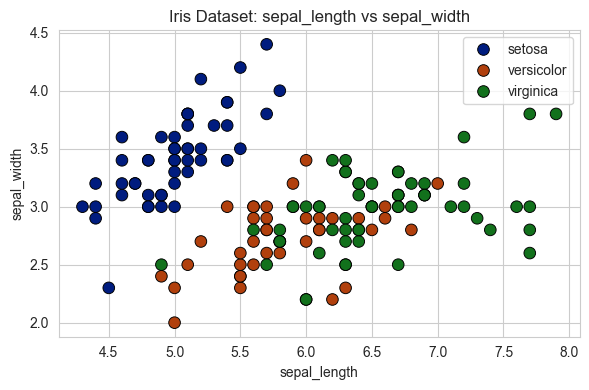

In [5]:
import panel as pn
pn.extension()

iris = sns.load_dataset('iris')
feature_cols = list(iris.columns[:-1])  # Exclude "species"

def iris_scatter(x_feature, y_feature):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=iris, x=x_feature, y=y_feature, hue="species",
        palette="dark", s=70, edgecolor="black"
    )
    plt.title(f"Iris Dataset: {x_feature} vs {y_feature}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(loc="upper right")
    plt.tight_layout()
    return pn.pane.Matplotlib(plt.gcf(), tight=True)

# Use Select widget
x_select = pn.widgets.Select(name="X-Axis", options=feature_cols, value="sepal_length")
y_select = pn.widgets.Select(name="Y-Axis", options=feature_cols, value="sepal_width")

dashboard = pn.Column(
    "## 🌸 Interactive Iris Dashboard",
    "Choose features to plot on the axes:",
    pn.Row(x_select, y_select),
    pn.bind(iris_scatter, x_feature=x_select, y_feature=y_select)
)

In [6]:
# Refresh the page once you make the change in options
dashboard.show()

Launching server at http://localhost:62813
